{'2009': 17, '2016': 30, '2011': 18, '2015': 25, '1988': 3, '2012': 24, '2017': 25, '2013': 21, '2008': 17, '2006': 15, '2001': 3, '2014': 26, '2018': 34, '1998': 6, '2000': 2, '1997': 4, '1999': 4, '2019': 4, '2005': 2, '2004': 10, '2007': 14, '2010': 16, '1980': 1, '1993': 1, '1992': 1, '2002': 6, '1984': 1, '2003': 8, '1996': 2, '1986': 2, '1979': 2, '1995': 3, '1970': 1, '1989': 2}
{'1970': 1, '1979': 2, '1980': 1, '1984': 1, '1986': 2, '1988': 3, '1989': 2, '1992': 1, '1993': 1, '1995': 3, '1996': 2, '1997': 4, '1998': 6, '1999': 4, '2000': 2, '2001': 3, '2002': 6, '2003': 8, '2004': 10, '2005': 2, '2006': 15, '2007': 14, '2008': 17, '2009': 17, '2010': 16, '2011': 18, '2012': 24, '2013': 21, '2014': 26, '2015': 25, '2016': 30, '2017': 25, '2018': 34, '2019': 4}


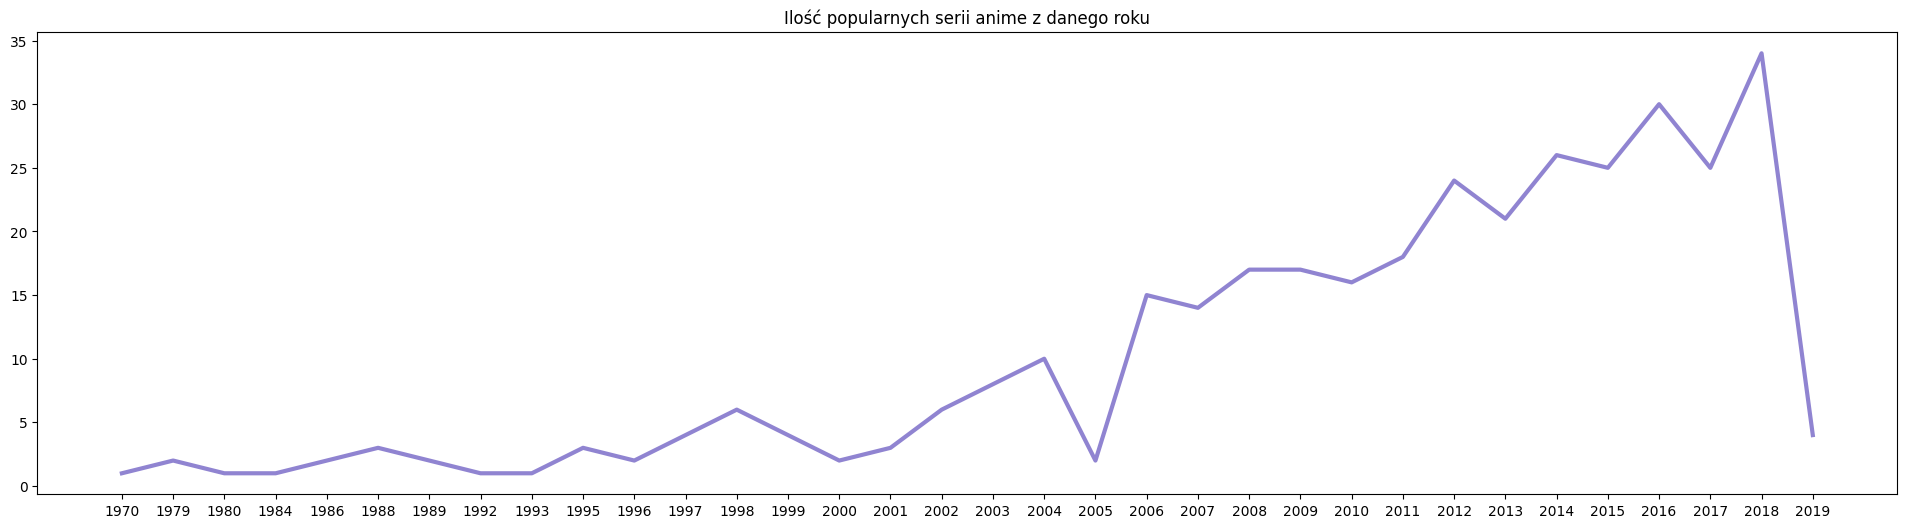

In [2]:
# 2019
# top 500 serii anime
urltab = ["https://web.archive.org/web/20190123231313/https://myanimelist.net/topanime.php",
          "https://web.archive.org/web/20190128051031/https://myanimelist.net/topanime.php?limit=50",
          "https://web.archive.org/web/20190128051630/https://myanimelist.net/topanime.php?limit=100",
          "https://web.archive.org/web/20190103215342/https://myanimelist.net/topanime.php?limit=150",
          "https://web.archive.org/web/20190103215338/https://myanimelist.net/topanime.php?limit=200",
          "https://web.archive.org/web/20190103215342/https://myanimelist.net/topanime.php?limit=250",
          "https://web.archive.org/web/20190103215354/https://myanimelist.net/topanime.php?limit=300"]

import urllib.request
from bs4 import BeautifulSoup
import re
years2 = []

def count_years(year_list):
    year_count = {}
    for year in year_list:
        if year in year_count:
            year_count[year] += 1
        else:
            year_count[year] = 1
    return year_count

for url in urltab:
    response = urllib.request.urlopen(url)
    html = response.read()

    htmlParse = BeautifulSoup(html, 'html.parser')

    div_elements = htmlParse.find_all('div', class_='information di-ib mt4')

    for div in div_elements:
        # print(div.get_text())
        text = div.get_text()
        year_match = re.search(r"\b\d{4}\b", text)

        if year_match:
            year = year_match.group()
            # print("Year:", year)
            years2.append(year)
        else:
            print("No year found.")

result2 = count_years(years2)
print(result2)

new_dict = dict(sorted(result2.items()))
print(new_dict)

yr = list(new_dict.keys())
vl = list(new_dict.values())

import matplotlib.pyplot as plt
import numpy as np

f = plt.figure()
f.set_figwidth(24)
f.set_figheight(6)
plt.title("Ilość popularnych serii anime z danego roku")
plt.plot(yr,vl, color='#9084D1', linewidth = '3')

{'1970s': 3, '1980s': 9, '1990s': 21, '2000s': 94, '2010s': 223}
{'1970s': 3, '1980s': 9, '1990s': 21, '2000s': 94, '2010s': 223}


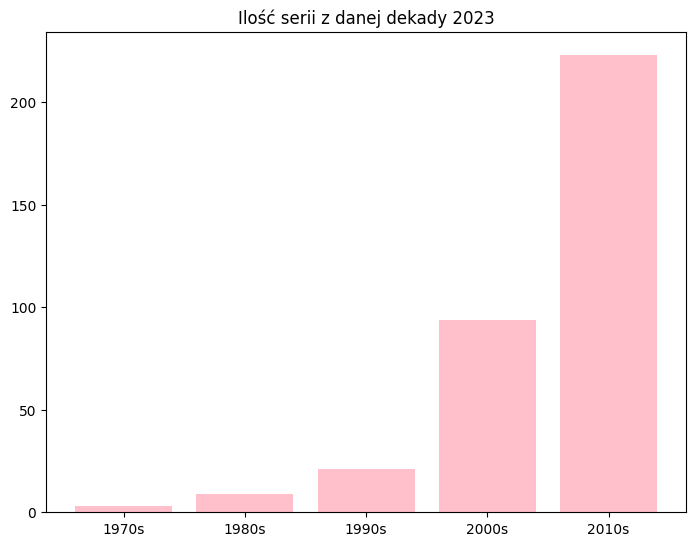

In [4]:
# 2019
# decades 500 anime

urltab = ["https://web.archive.org/web/20190123231313/https://myanimelist.net/topanime.php",
          "https://web.archive.org/web/20190128051031/https://myanimelist.net/topanime.php?limit=50",
          "https://web.archive.org/web/20190128051630/https://myanimelist.net/topanime.php?limit=100",
          "https://web.archive.org/web/20190103215342/https://myanimelist.net/topanime.php?limit=150",
          "https://web.archive.org/web/20190103215338/https://myanimelist.net/topanime.php?limit=200",
          "https://web.archive.org/web/20190103215342/https://myanimelist.net/topanime.php?limit=250",
          "https://web.archive.org/web/20190103215354/https://myanimelist.net/topanime.php?limit=300"]

import urllib.request
from bs4 import BeautifulSoup
import re
years = []

def count_years(year_list):
    year_count = {}
    for year in year_list:
        if year in year_count:
            year_count[year] += 1
        else:
            year_count[year] = 1
    return year_count

for url in urltab:
    response = urllib.request.urlopen(url)
    html = response.read()

    htmlParse = BeautifulSoup(html, 'html.parser')

    div_elements = htmlParse.find_all('div', class_='information di-ib mt4')

    for div in div_elements:
        # print(div.get_text())
        text = div.get_text()
        year_match = re.search(r"\b\d{4}\b", text)

        if year_match:
            year = year_match.group()
            # print("Year:", year)
            years.append(year)
        # else:
        #     print("No year found.")

result2 = count_years(years)
# print(result2)

new_dict = dict(sorted(result2.items()))
# print(new_dict)

def group_by_decades(year_dict):
    decade_dict = {}
    for year, count in year_dict.items():
        decade = str(year)[:3] + "0s"
        if decade in decade_dict:
            decade_dict[decade] += count
        else:
            decade_dict[decade] = count
    return decade_dict

print(group_by_decades(new_dict))

new = group_by_decades(new_dict)
# new.pop('1780s')
print(new)

import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

yr2 = list(new.keys())
vl2 = list(new.values())

ax.bar(yr2,vl2, color='pink')
plt.title("Ilość serii z danej dekady 2023")
plt.show()